### 載入中文

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2025-06-06 07:41:00--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.132.102, 74.125.132.101, 74.125.132.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-06 07:41:00--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.179.132, 2607:f8b0:4001:c68::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  82.6MB/s    in 0.2s    

2025-06-06 07:41:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 添加剛剛下載的字體
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')

plt.rcParams['font.family'] = ['Taipei Sans TC Beta']

plt.rcParams['axes.unicode_minus'] = False

### 畫圖

####前處理

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


files = {
    '一沐日':      '一沐日_processed.csv',
    '八曜':        '八曜_processed.csv',
    '再睡五分鐘':  '再睡五分鐘_processed.csv',
    '迷客夏':      '迷客夏_processed.csv',
    '麻古':        '麻古_processed.csv'
}

df_list = []
for brand, path in files.items():
    temp = pd.read_csv(path)
    temp['brand'] = brand


    if 'date' in temp.columns:
        temp['date'] = pd.to_datetime(temp['date'], errors='coerce')
    df_list.append(temp)


combined_df = pd.concat(df_list, ignore_index=True)


for col in ['like', 'comment', 'share', 'forward']:
    if col not in combined_df.columns:
        combined_df[col] = np.nan

print("資料總筆數:", combined_df.shape[0])
combined_df.head()

資料總筆數: 686


,content,like,comment,forward,share,date,brand
0,6/2出新品，你準備好了嗎:墨镜笑脸:,183,17,1,30,2025-05-26,一沐日
1,:金牌:第一名｜,16,1,154,3,2025-05-19,一沐日
2,活動截止～所有留言已截圖紀錄，謝謝大家參與！,10,2,837,415,2025-05-12,一沐日
3,風雨無阻，只為信仰而走\n讓我們看到真正的「台灣情」！,196,5,3,0,2025-05-12,一沐日
4,邊白沙屯的路上邊找大家一起完成:墨镜笑脸:,456,5,2,24,2025-05-06,一沐日


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  668 non-null    object        
 1   like     686 non-null    int64         
 2   comment  686 non-null    int64         
 3   forward  686 non-null    int64         
 4   share    686 non-null    int64         
 5   date     686 non-null    datetime64[ns]
 6   brand    686 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 37.6+ KB


In [ ]:
combined_df.head(5)

,content,like,comment,forward,share,date,brand
0,6/2出新品，你準備好了嗎:墨镜笑脸:,183,17,1,30,2025-05-26,一沐日
1,:金牌:第一名｜,16,1,154,3,2025-05-19,一沐日
2,活動截止～所有留言已截圖紀錄，謝謝大家參與！,10,2,837,415,2025-05-12,一沐日
3,風雨無阻，只為信仰而走\n讓我們看到真正的「台灣情」！,196,5,3,0,2025-05-12,一沐日
4,邊白沙屯的路上邊找大家一起完成:墨镜笑脸:,456,5,2,24,2025-05-06,一沐日


In [ ]:
combined_df.tail(5)

,content,like,comment,forward,share,date,brand
681,我有超過300杯的高山金萱茶 你有超頂創意喝法嗎:吐舌:\r\n機會是自己爭取來的\r\n快...,22,2,0,0,2025-04-23,麻古
682,手搖控,16,40,1,20,2025-04-18,麻古
683,聽說最近公仔圖很紅:礼物::泰迪熊:\r\n那你知道麻古的蕃茄梅蜜也很紅嗎？:西红柿::爆炸...,79,6,11,1,2025-04-11,麻古
684,最愛這種挑戰時刻 :肌肉:,88,15,0,14,2025-04-10,麻古
685,:热带水果饮料:嗨大家好，我們是麻古的小編:胜利手势:\r\n從今天開始，我們會在 Thre...,906,362,26,2,2025-04-10,麻古


In [ ]:
combined_df[['like','comment','share','forward']].describe()

,like,comment,share,forward
count,686.000000,686.000000,686.000000,686.000000
mean,397.180758,52.517493,78.616618,251.881924
std,1009.774109,474.235288,290.938045,2037.429598
min,1.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,5.000000,0.000000
50%,108.500000,3.000000,19.000000,6.000000
75%,351.250000,14.750000,57.000000,41.000000
max,19000.000000,11000.000000,5387.000000,40000.000000


各品牌樣本數：
brand
八曜       508
迷客夏       76
一沐日       60
再睡五分鐘     31
麻古        11
Name: count, dtype: int64


<ipython-input-8-637045d042a8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='Set2')


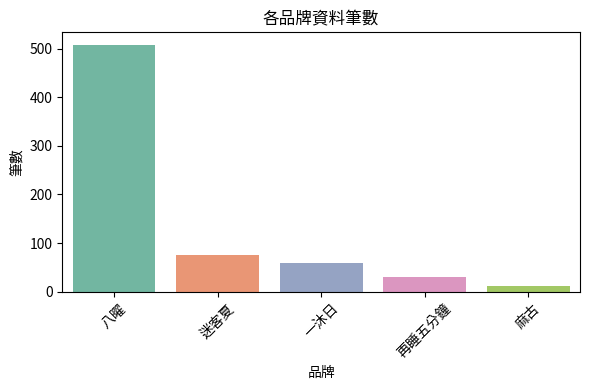

In [ ]:
brand_counts = combined_df['brand'].value_counts()
print("各品牌樣本數：")
print(brand_counts)


plt.figure(figsize=(6,4))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='Set2')
plt.title("各品牌資料筆數")
plt.xlabel("品牌")
plt.ylabel("筆數")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
missing_ratio = combined_df.isna().mean() * 100
print("欄位缺值比例 (%):")
print(missing_ratio.round(2))

欄位缺值比例 (%):
content    2.62
like       0.00
comment    0.00
forward    0.00
share      0.00
date       0.00
brand      0.00
dtype: float64


####箱型圖

<ipython-input-10-b026dc5d917a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='like', data=combined_df, ax=axes[0], palette='Set2')
<ipython-input-10-b026dc5d917a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='like', data=combined_df, ax=axes[1], palette='Set2')
<ipython-input-10-b026dc5d917a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='like', data=df_clip, ax=axes[2], palette='Set2')


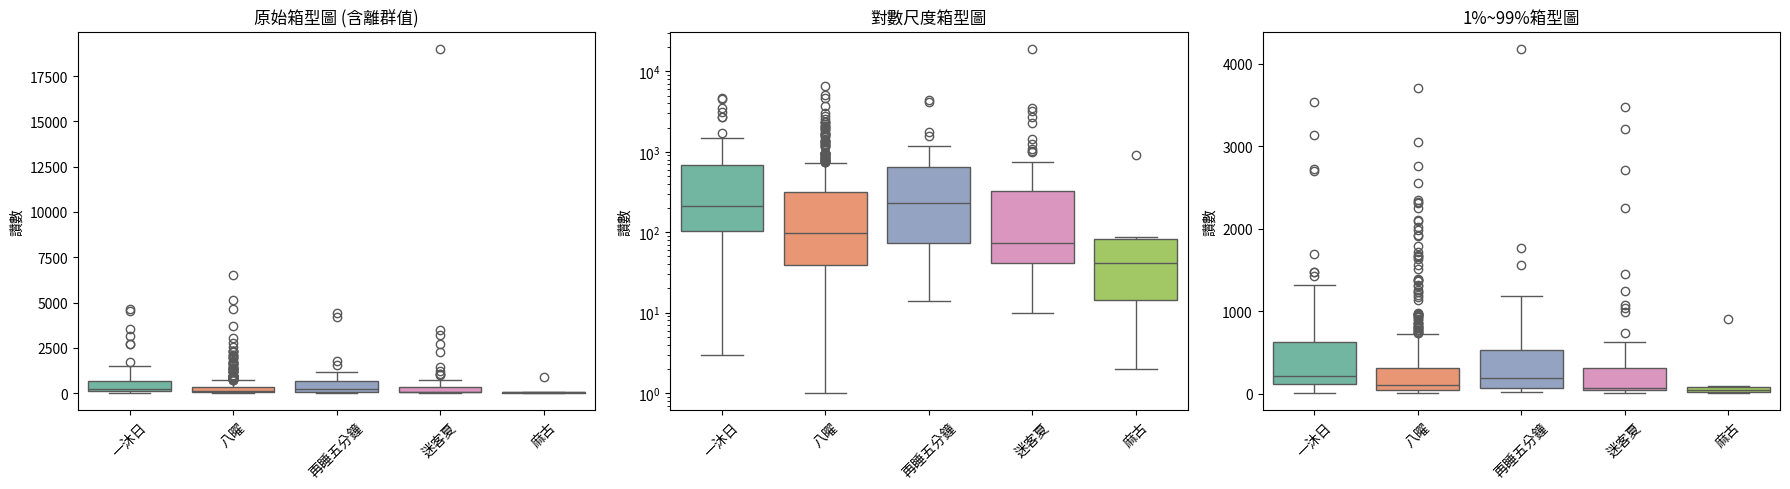

In [ ]:
# like
p1 = combined_df['like'].quantile(0.01)
p99 = combined_df['like'].quantile(0.99)
mask = (combined_df['like'] >= p1) & (combined_df['like'] <= p99)
df_clip = combined_df[mask]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# (1) 原始箱型圖 (含所有離群值)
sns.boxplot(x='brand', y='like', data=combined_df, ax=axes[0], palette='Set2')
axes[0].set_title('原始箱型圖 (含離群值)')
axes[0].tick_params(axis='x', rotation=45)

# (2) 對數尺度箱型圖
sns.boxplot(x='brand', y='like', data=combined_df, ax=axes[1], palette='Set2')
axes[1].set_yscale('log')
axes[1].set_title('對數尺度箱型圖')
axes[1].tick_params(axis='x', rotation=45)

# (3) 裁切至 1~99 百分位之箱型圖
sns.boxplot(x='brand', y='like', data=df_clip, ax=axes[2], palette='Set2')
axes[2].set_title('1%~99%箱型圖')
axes[2].tick_params(axis='x', rotation=45)

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('讚數')

plt.tight_layout()
plt.show()

<ipython-input-11-7fd0f78ab5ed>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='comment', data=combined_df, ax=axes[0], palette='Set2')
<ipython-input-11-7fd0f78ab5ed>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='comment', data=combined_df, ax=axes[1], palette='Set2')
<ipython-input-11-7fd0f78ab5ed>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='comment', data=df_clip, ax=axes[2], palette='Set2')


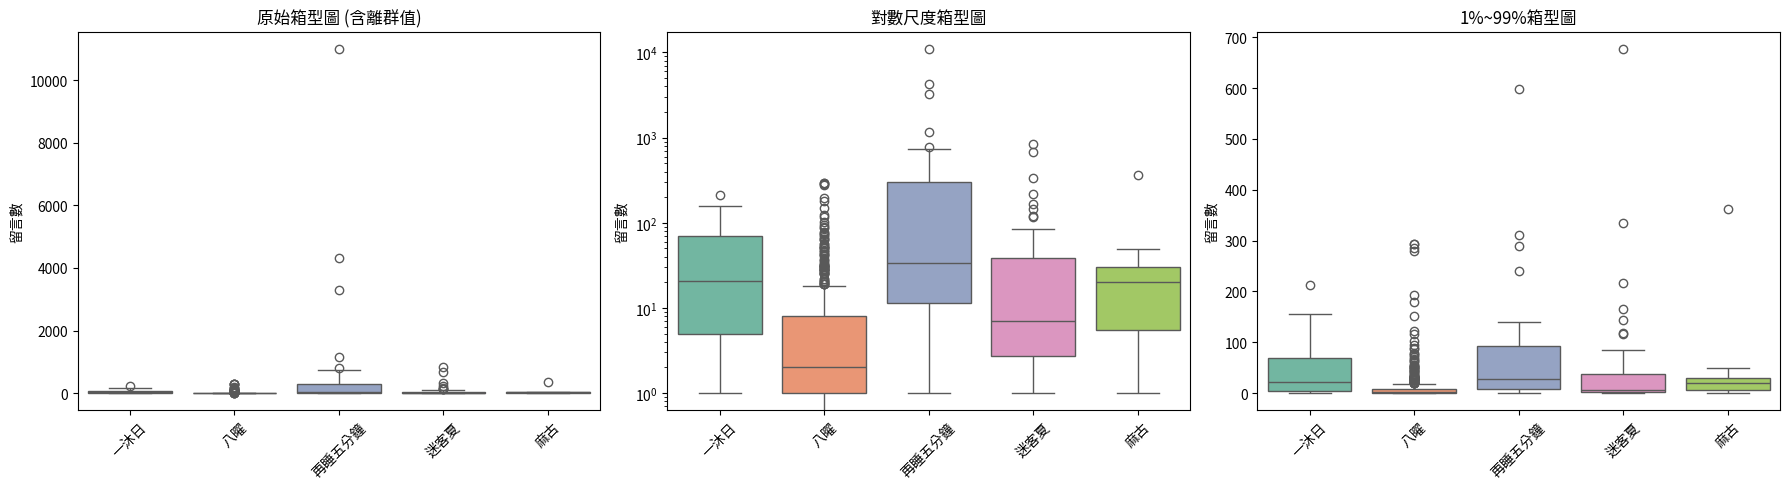

In [ ]:
# comment
p1 = combined_df['comment'].quantile(0.01)
p99 = combined_df['comment'].quantile(0.99)
mask = (combined_df['comment'] >= p1) & (combined_df['comment'] <= p99)
df_clip = combined_df[mask]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# (1) 原始箱型圖 (含所有離群值)
sns.boxplot(x='brand', y='comment', data=combined_df, ax=axes[0], palette='Set2')
axes[0].set_title('原始箱型圖 (含離群值)')
axes[0].tick_params(axis='x', rotation=45)

# (2) 對數尺度箱型圖
sns.boxplot(x='brand', y='comment', data=combined_df, ax=axes[1], palette='Set2')
axes[1].set_yscale('log')
axes[1].set_title('對數尺度箱型圖')
axes[1].tick_params(axis='x', rotation=45)

# (3) 裁切至 1~99 百分位之箱型圖
sns.boxplot(x='brand', y='comment', data=df_clip, ax=axes[2], palette='Set2')
axes[2].set_title('1%~99%箱型圖')
axes[2].tick_params(axis='x', rotation=45)

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('留言數')

plt.tight_layout()
plt.show()

<ipython-input-12-6d0f3857760b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='share', data=combined_df, ax=axes[0], palette='Set2')
<ipython-input-12-6d0f3857760b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='share', data=combined_df, ax=axes[1], palette='Set2')
<ipython-input-12-6d0f3857760b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='share', data=df_clip, ax=axes[2], palette='Set2')


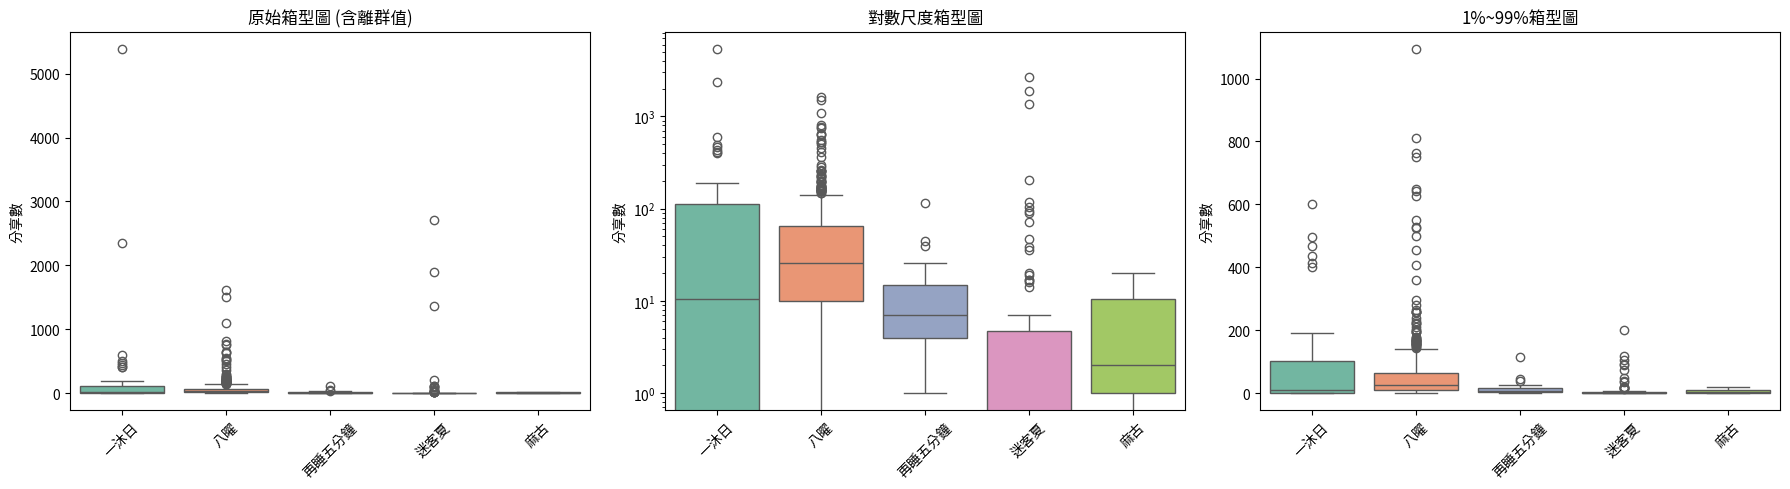

In [ ]:
# share
p1 = combined_df['share'].quantile(0.01)
p99 = combined_df['share'].quantile(0.99)
mask = (combined_df['share'] >= p1) & (combined_df['share'] <= p99)
df_clip = combined_df[mask]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# (1) 原始箱型圖 (含所有離群值)
sns.boxplot(x='brand', y='share', data=combined_df, ax=axes[0], palette='Set2')
axes[0].set_title('原始箱型圖 (含離群值)')
axes[0].tick_params(axis='x', rotation=45)

# (2) 對數尺度箱型圖
sns.boxplot(x='brand', y='share', data=combined_df, ax=axes[1], palette='Set2')
axes[1].set_yscale('log')
axes[1].set_title('對數尺度箱型圖')
axes[1].tick_params(axis='x', rotation=45)

# (3) 裁切至 1~99 百分位之箱型圖
sns.boxplot(x='brand', y='share', data=df_clip, ax=axes[2], palette='Set2')
axes[2].set_title('1%~99%箱型圖')
axes[2].tick_params(axis='x', rotation=45)

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('分享數')

plt.tight_layout()
plt.show()

<ipython-input-13-47e72ea27068>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='forward', data=combined_df, ax=axes[0], palette='Set2')
<ipython-input-13-47e72ea27068>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='forward', data=combined_df, ax=axes[1], palette='Set2')
<ipython-input-13-47e72ea27068>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='forward', data=df_clip, ax=axes[2], palette='Set2')


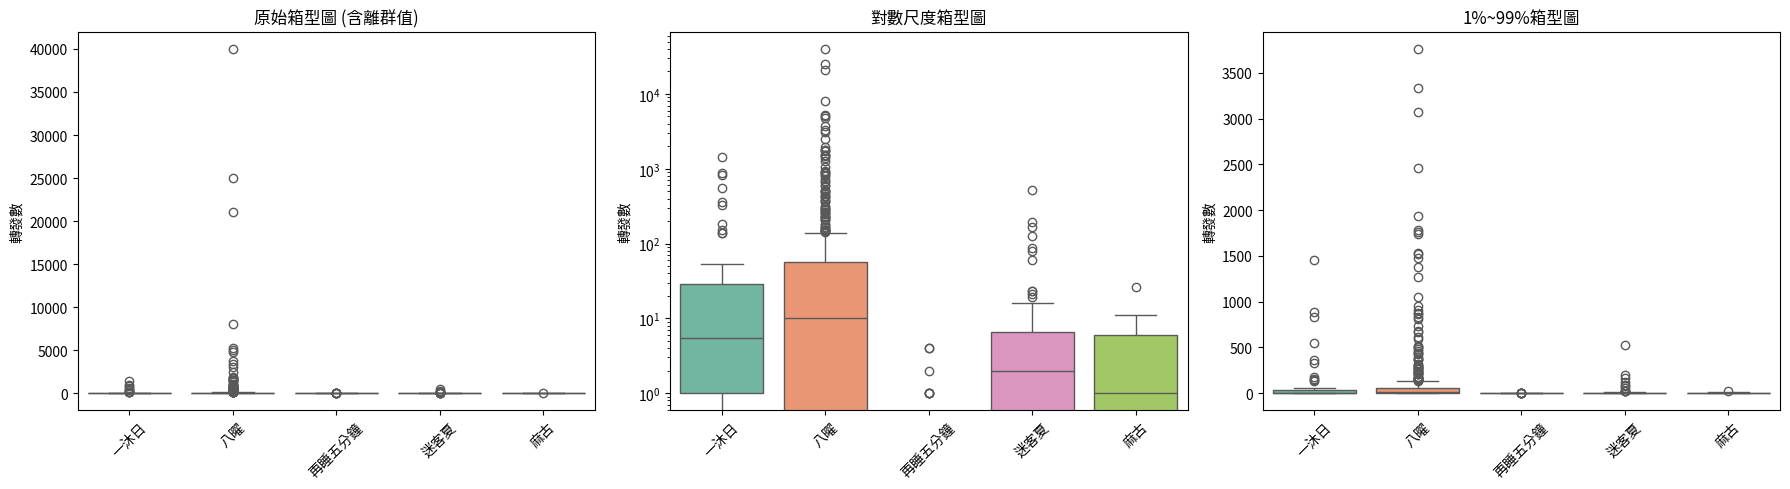

In [ ]:
# forward
p1 = combined_df['forward'].quantile(0.01)
p99 = combined_df['forward'].quantile(0.99)
mask = (combined_df['forward'] >= p1) & (combined_df['forward'] <= p99)
df_clip = combined_df[mask]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# (1) 原始箱型圖 (含所有離群值)
sns.boxplot(x='brand', y='forward', data=combined_df, ax=axes[0], palette='Set2')
axes[0].set_title('原始箱型圖 (含離群值)')
axes[0].tick_params(axis='x', rotation=45)

# (2) 對數尺度箱型圖
sns.boxplot(x='brand', y='forward', data=combined_df, ax=axes[1], palette='Set2')
axes[1].set_yscale('log')
axes[1].set_title('對數尺度箱型圖')
axes[1].tick_params(axis='x', rotation=45)

# (3) 裁切至 1~99 百分位之箱型圖
sns.boxplot(x='brand', y='forward', data=df_clip, ax=axes[2], palette='Set2')
axes[2].set_title('1%~99%箱型圖')
axes[2].tick_params(axis='x', rotation=45)

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('轉發數')

plt.tight_layout()
plt.show()

#### 其他

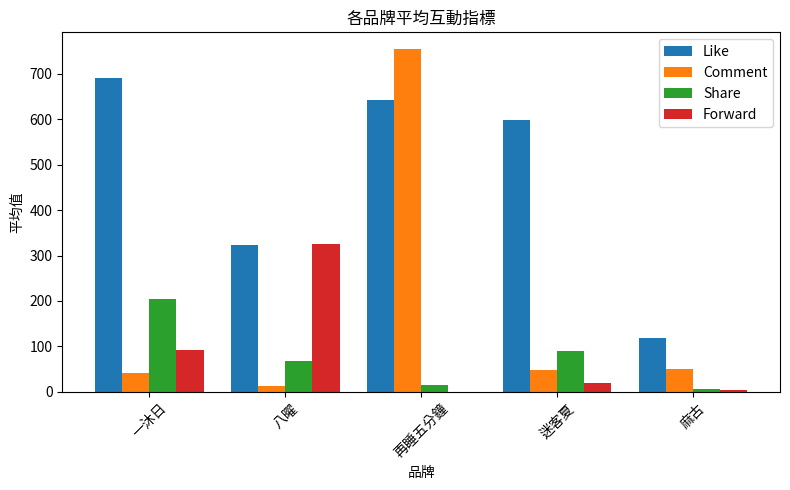

In [ ]:
# 各品牌平均互動指標長條圖
avg_metrics = combined_df.groupby('brand')[['like', 'comment', 'share', 'forward']].mean()

plt.figure(figsize=(8, 5))
bar_width = 0.2
indices = np.arange(len(files))

plt.bar(indices - 1.5 * bar_width, avg_metrics['like'], width=bar_width, label='Like')
plt.bar(indices - 0.5 * bar_width, avg_metrics['comment'], width=bar_width, label='Comment')
plt.bar(indices + 0.5 * bar_width, avg_metrics['share'], width=bar_width, label='Share')
plt.bar(indices + 1.5 * bar_width, avg_metrics['forward'], width=bar_width, label='Forward')

plt.title('各品牌平均互動指標')
plt.xlabel('品牌')
plt.ylabel('平均值')
plt.xticks(indices, list(files.keys()), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

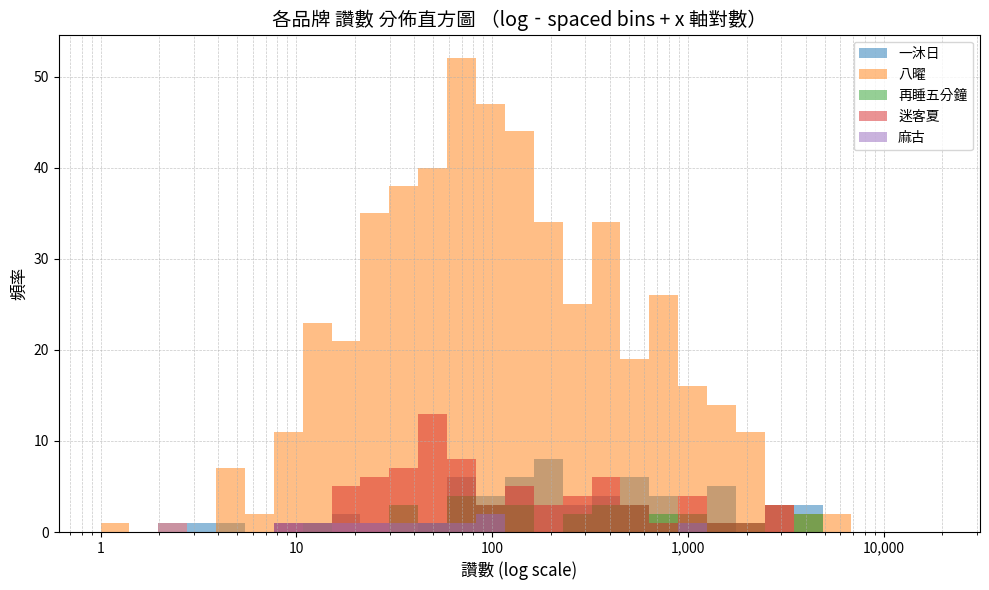

In [ ]:
plt.figure(figsize=(10, 6))

#（1）先找出所有品牌裡「讚數」大於 0 的最小值和最大值
all_likes = combined_df['like'].dropna()
min_pos = all_likes[all_likes > 0].min()  # 忽略 0 的部分，因為 log(0) 無意義
max_like = all_likes.max()

#（2）產生「對數等距分箱」邊界
#     例如 30 個箱子，就在 min_pos ~ max_like 之間平均取對數空間的邊界
log_bins = np.logspace(np.log10(min_pos), np.log10(max_like), num=30)

#（3）針對每個品牌，各自畫使用 log_bins 的直方圖
for brand in combined_df['brand'].unique():
    data = combined_df.loc[combined_df['brand'] == brand, 'like'].dropna()
    # 注意：要用 bins=log_bins，並把 stat='count' 保持預設行為
    plt.hist(data, bins=log_bins, alpha=0.5, label=brand)

#（4）把 x 軸設為 log
plt.xscale('log')

#（5）調整座標軸刻度標籤，只顯示常見的 10^n
from matplotlib.ticker import LogLocator, FuncFormatter

ax = plt.gca()
ax.xaxis.set_major_locator(LogLocator(base=10, numticks=10))       # 主刻度：10^n
ax.xaxis.set_minor_locator(LogLocator(base=10, subs="auto", numticks=10))  # 次刻度：2*10^n,3*10^n...
ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: f"{int(val):,}"))  # 以千分位顯示，如 1,000; 10,000

plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title("各品牌 讚數 分佈直方圖 （log‐spaced bins + x 軸對數）", fontsize=14)
plt.xlabel("讚數 (log scale)", fontsize=12)
plt.ylabel("頻率", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

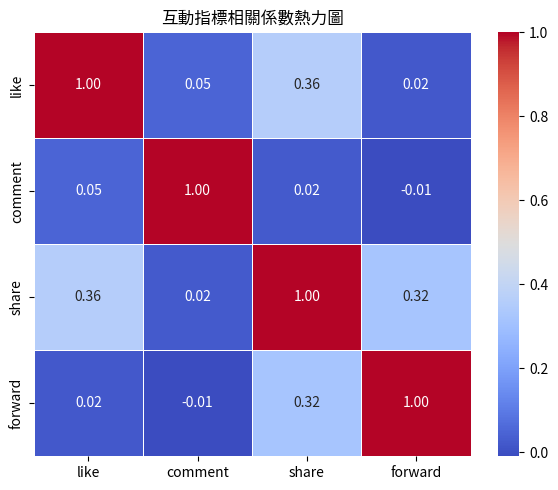

In [ ]:
corr_cols = ['like','comment','share','forward']
corr_matrix = combined_df[corr_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("互動指標相關係數熱力圖")
plt.tight_layout()
plt.show()

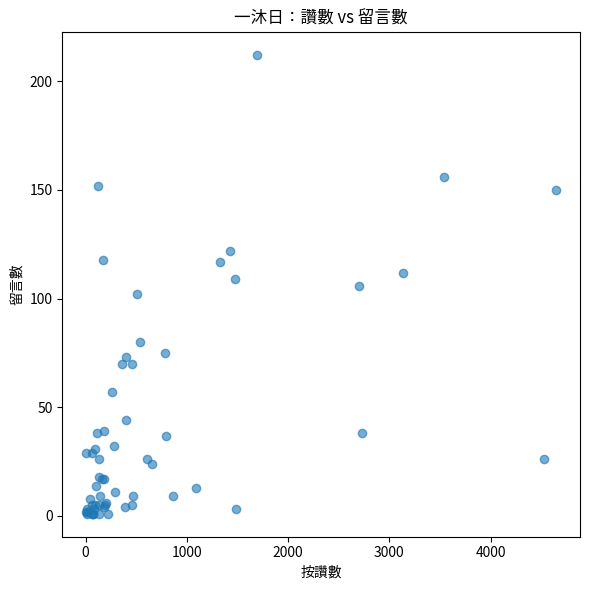

In [ ]:
example = combined_df[combined_df['brand'] == '一沐日'].dropna(subset=['like', 'comment'])
plt.figure(figsize=(6, 6))
plt.scatter(example['like'], example['comment'], alpha=0.6)
plt.title('一沐日：讚數 vs 留言數')
plt.xlabel('按讚數')
plt.ylabel('留言數')
plt.tight_layout()
plt.show()

In [ ]:
top10 = combined_df.nlargest(10, 'like')[['brand','date','content','like','comment','share','forward']]
print("Top 10 按讚數排序的貼文：")
top10.reset_index(drop=True)

Top 10 按讚數排序的貼文：


,brand,date,content,like,comment,share,forward
0,迷客夏,2024-07-18,#迷客夏是臺灣品牌,19000,677,1902,524
1,八曜,2024-06-09,是八「曜」和茶，\n不是八「耀」和茶，鞋感,6546,179,257,0
2,八曜,2024-06-10,通常是男生容易被「情勒」，還是女生？\n.\n.\n.\n.\n都不是，是小編\n誰懂被一百...,5152,122,53,0
3,八曜,2025-03-18,如何安慰別人？\n-\n:叉号:說教。\n:叉号:傾聽。\n:叉号:擁抱。\n:红色空心圆圈...,4669,51,160,0
4,一沐日,2025-03-08,竟然大家這麼喜歡粉粿\n只好幫他拍一個特輯了,4650,150,600,138
5,一沐日,2025-05-03,早安:绿心:一沐日的夥伴們已經在北港準備好了,4523,26,186,17
6,再睡五分鐘,2024-11-26,現在大家都流行在留言備註區告白ㄇ？:想一想:,4427,43,17,0
7,再睡五分鐘,2025-03-26,闆娘好像不是開玩笑的⋯\r\n居然找了幫手一起練習做菜\r\n賣相看起來不錯 就是不知道味道...,4182,92,39,0
8,八曜,2025-02-01,來辦個B-Box鞭炮聲比賽\n-\n這則貼文只能用語音回覆,3711,294,78,0
9,一沐日,2024-07-07,最近看了Threads的留言\n「一沐日就是一個與世無爭的品牌」,3536,156,30,13


In [ ]:
!pip install --quiet wordcloud jieba

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.014 seconds.
DEBUG:jieba:Loading model cost 1.014 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


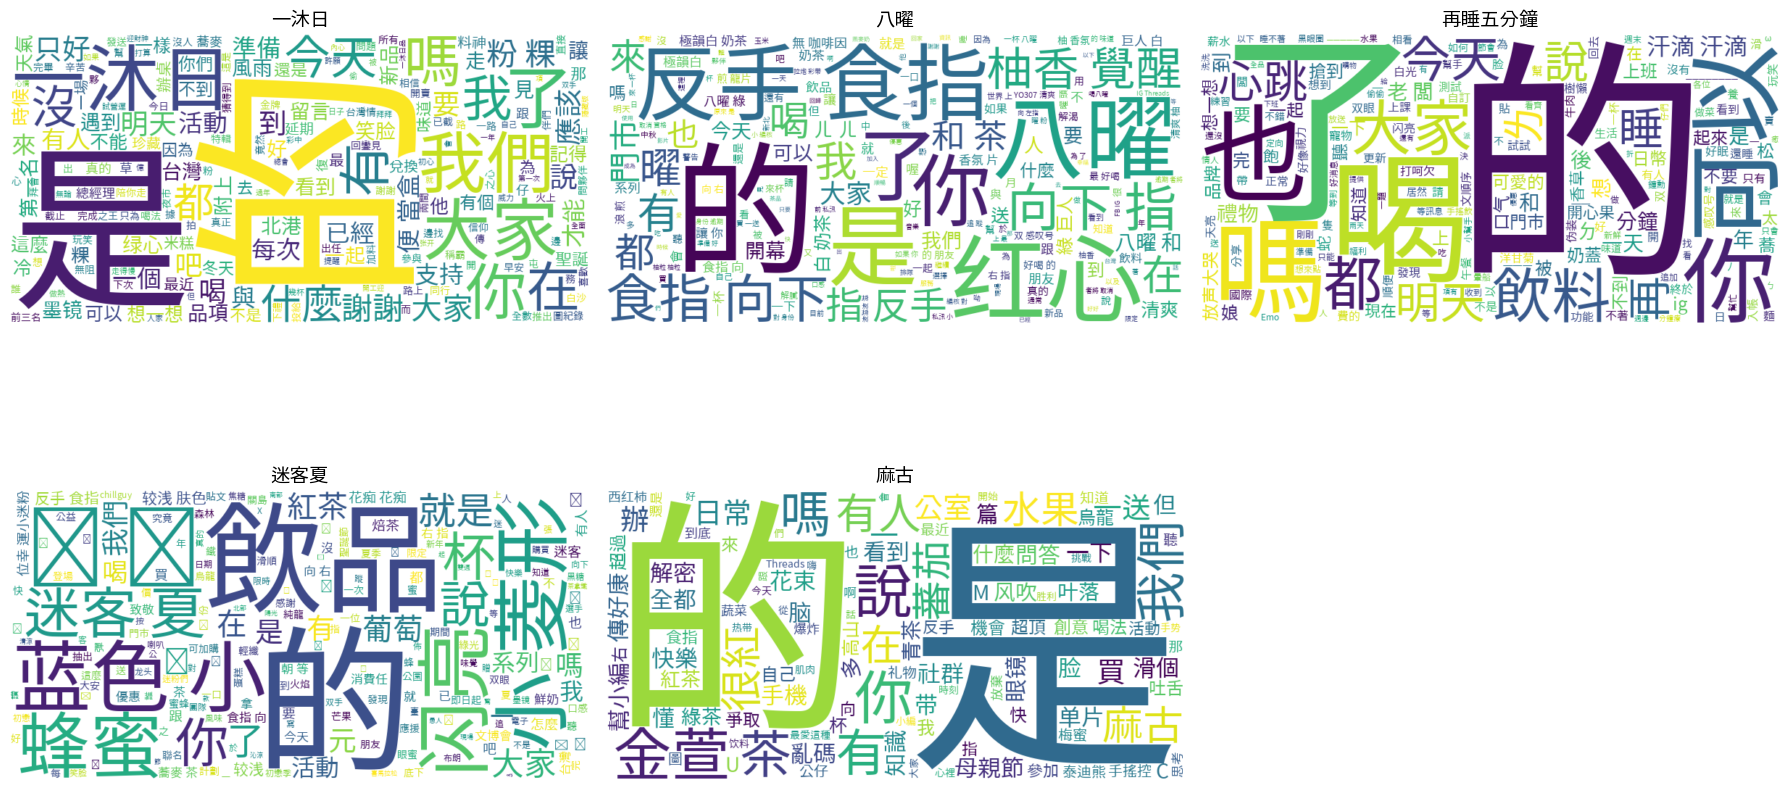

In [ ]:
from wordcloud import WordCloud
import jieba

brands = combined_df['brand'].unique()

font_path = '/content/TaipeiSansTCBeta-Regular.ttf'

# 3. 建立 2×3 的 subplot，最後一格如果沒用到就隱藏
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, brand in enumerate(brands):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # 3.1 合併該品牌所有 content
    texts = combined_df.loc[combined_df['brand'] == brand, 'content'].dropna().astype(str)
    all_text = " ".join(texts.tolist())

    # 3.2 用 jieba 斷詞，並用空格串接
    words = jieba.lcut(all_text)
    wc_text = " ".join(words)

    # 3.3 生成 WordCloud
    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400
    )
    wc.generate(wc_text)

    # 3.4 顯示在子圖上
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f"{brand}", fontsize=14)

# 如果品牌數量少於 6，就把多餘的子圖刪掉
if len(brands) < 6:
    for empty_idx in range(len(brands), 6):
        fig.delaxes(axes[empty_idx // 3, empty_idx % 3])

plt.tight_layout()
plt.show()

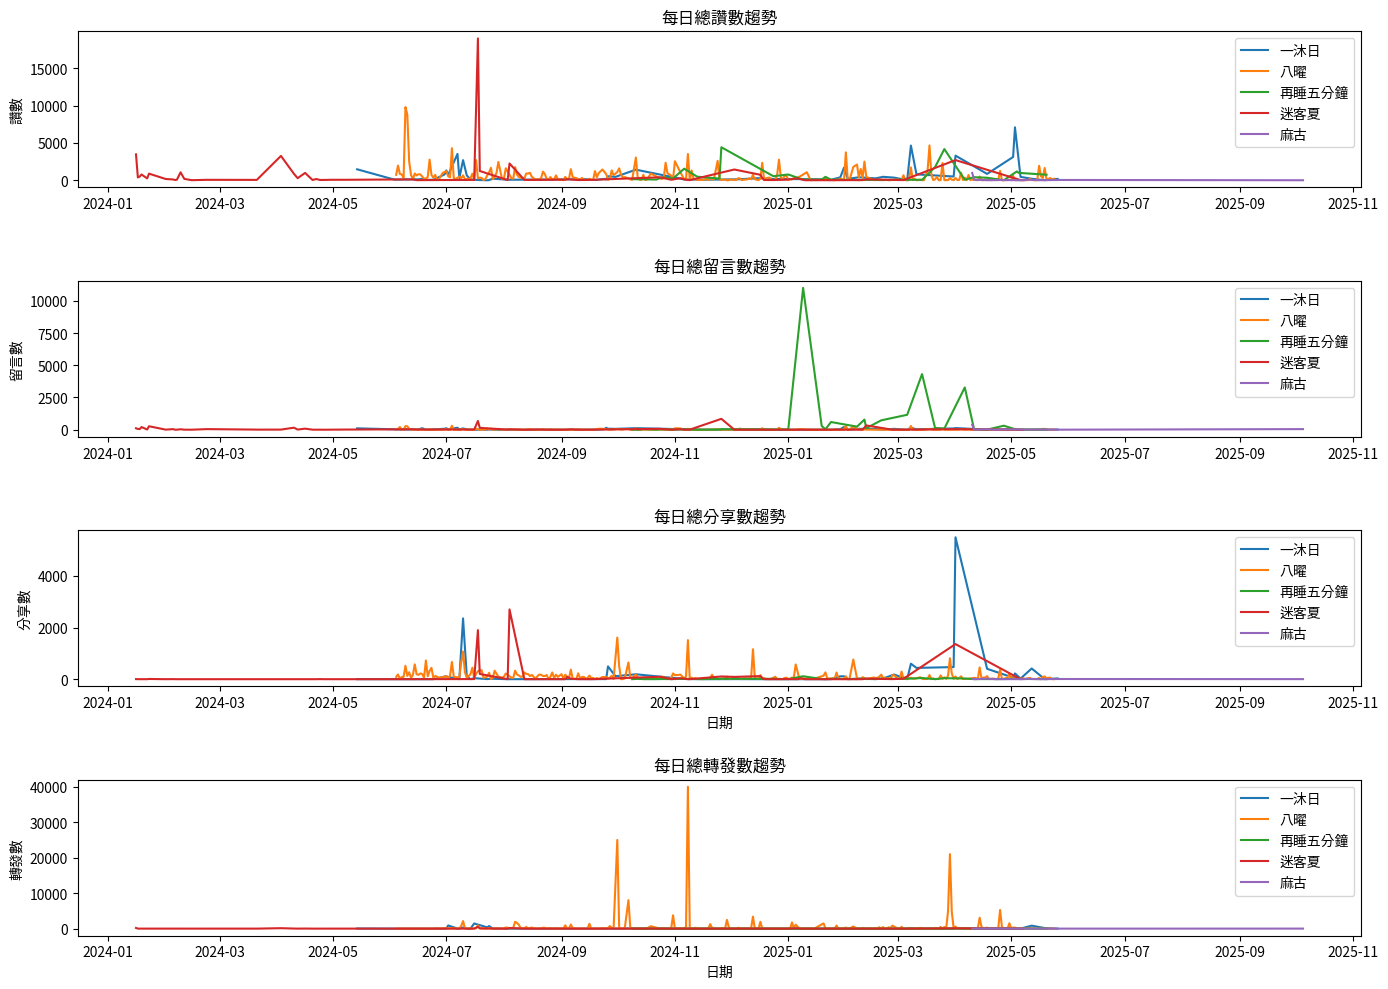

In [ ]:
plt.figure(figsize=(14, 10))

# 每日總讚數
plt.subplot(4,1,1)
for brand in combined_df['brand'].unique():
    daily = combined_df[combined_df['brand']==brand].groupby('date')['like'].sum().sort_index()
    plt.plot(daily.index, daily.values, label=brand)
plt.title("每日總讚數趨勢")
plt.ylabel("讚數")
plt.legend()

# 每日總留言數
plt.subplot(4,1,2)
for brand in combined_df['brand'].unique():
    daily = combined_df[combined_df['brand']==brand].groupby('date')['comment'].sum().sort_index()
    plt.plot(daily.index, daily.values, label=brand)
plt.title("每日總留言數趨勢")
plt.ylabel("留言數")
plt.legend()

# 每日總分享數
plt.subplot(4,1,3)
for brand in combined_df['brand'].unique():
    daily = combined_df[combined_df['brand']==brand].groupby('date')['share'].sum().sort_index()
    plt.plot(daily.index, daily.values, label=brand)
plt.title("每日總分享數趨勢")
plt.ylabel("分享數")
plt.xlabel("日期")
plt.legend()

# 每日總轉發數
plt.subplot(4,1,4)
for brand in combined_df['brand'].unique():
    daily = combined_df[combined_df['brand']==brand].groupby('date')['forward'].sum().sort_index()
    plt.plot(daily.index, daily.values, label=brand)
plt.title("每日總轉發數趨勢")
plt.ylabel("轉發數")
plt.xlabel("日期")
plt.legend()

plt.tight_layout(h_pad=2.0)
plt.show()